<a href="https://colab.research.google.com/github/binit24/Time-Series-Analysis-and-NLP/blob/main/Malignant_Comments_Classifier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lets import Libraries:
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open("train.csv")

In [ ]:
#Displaying all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
#Reading the Dataset:
df = pd.read_csv('train.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(159571, 8)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
#Checking no of rows and columns:
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  159571
No. of columns =  8


In [ ]:
#Reading the test Dataset:
df1 = pd.read_csv('test.csv')
print(df1.shape) #checking no of rows and columns in the dataset.
df1.head()

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
#Checking no of rows and columns test dataset:
print("No. of rows = ", df1.shape[0])
print("No. of columns = ", df1.shape[1])

No. of rows =  153164
No. of columns =  2


In [ ]:
#Lets work with Training Dataset:
#Checking the number of unique comments:
print("There are {} unique comments in this dataset".format(df.comment_text.nunique()))

There are 159571 unique comments in this dataset


In [ ]:
#Checking the datatypes of each feature:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [ ]:
#Checking null values:
df.isna().any()

id                  False
comment_text        False
malignant           False
highly_malignant    False
rude                False
threat              False
abuse               False
loathe              False
dtype: bool

In [ ]:
#Checking the missing values in data set
df.isnull().values.any()

False

In [ ]:
#Row indexes of empty rows
print("Row indexes of empty rows : ", df[df.isnull().all(axis =1)].index.tolist())

Row indexes of empty rows :  []


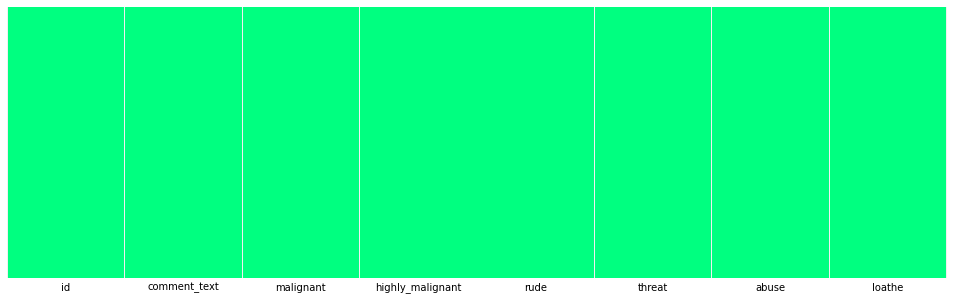

In [ ]:
#Seeing the missing values via visualization
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='winter_r')
plt.show()

In [ ]:
#Checking the info of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
#Checking Summary statitics:
print("Summary Statistics of the train data:")
df.describe().transpose()

Summary Statistics of the train data:


,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Checking the summary of object columns
df.describe(include=['object']).transpose()

,count,unique,top,freq
id,159571,159571,576b56eb089b1f74,1
comment_text,159571,159571,ps \n\nyou are a faggot with a clipboard\n\nMegna,1


In [ ]:
#Printing the object data types and their unique values:
for column in df.columns:
    if df[column].dtype==object:
        print("Seeing the Object features\n")
        print(str(column) + ' : ' + str(df[column].nunique()))
        print('*********************************************************') 
    if df[column].dtype=='int64':
        print("Seeing the Interger features\n")
        print(str(column) + ' : ' + str(df[column].nunique()))
        print("Unique Values:",df[column].unique())
        print('**********************************************************')

Seeing the Object features

id : 159571
*********************************************************
Seeing the Object features

comment_text : 159571
*********************************************************
Seeing the Interger features

malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

highly_malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

rude : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

threat : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

abuse : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

loathe : 2
Unique Values: [0 1]
**********************************************************


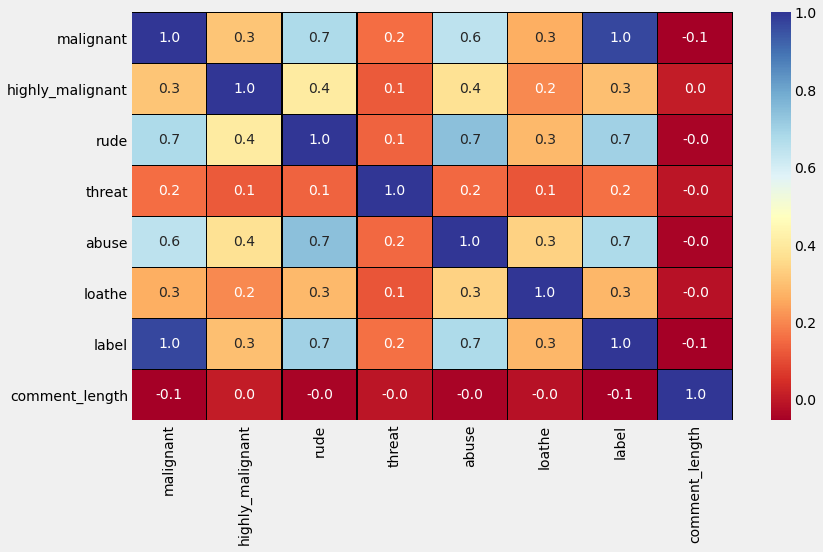

In [ ]:
#Lets check for corelation again and remove highly corelated feature as discussed above:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="RdYlBu",linecolor="black")
plt.show()

Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



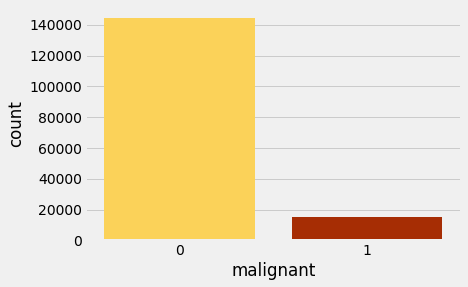

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



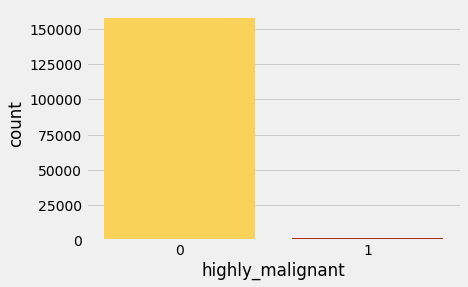

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



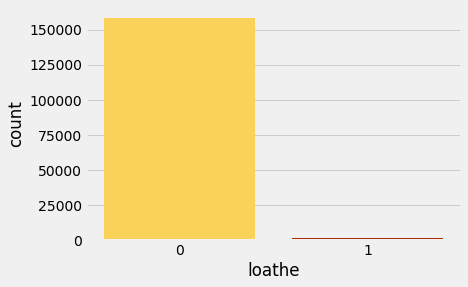

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



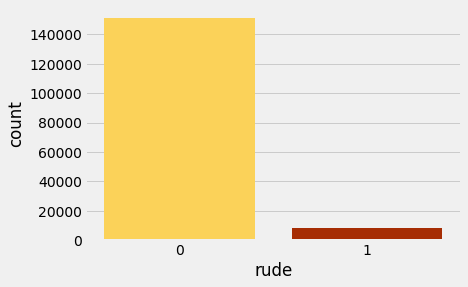

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



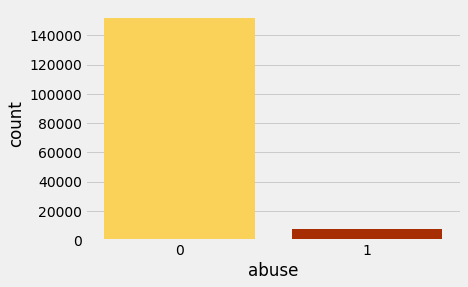

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



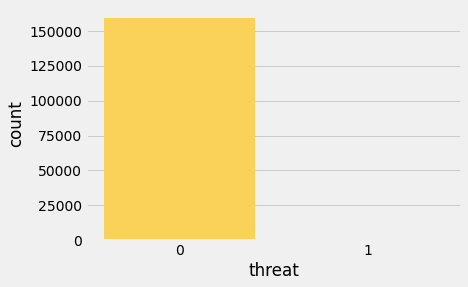

In [ ]:
#Bivariate Analysis:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print("Counting of labels for:", i)
    sns.countplot(df[i],palette='afmhot_r',saturation=0.95)
    print(df[i].value_counts(),'\n')
    plt.show()

In [ ]:
#Creating a new target column bt the combination of all features:
target_cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [ ]:
#Checking the sum:
df[target_cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [ ]:
#Creating new target column:
target_label = df[target_cols]
df['label'] = df[target_cols].sum(axis=1)
df.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


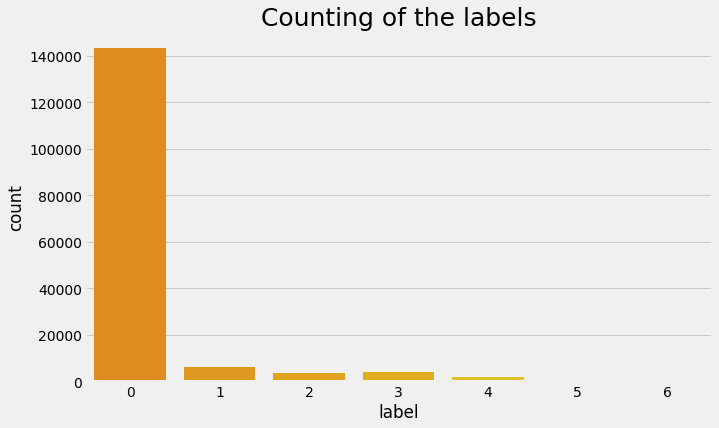

In [ ]:
#Checking the counting of labels
plt.figure(figsize=(10,6))
sns.countplot(df['label'], palette='Wistia_r')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [ ]:
df['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [ ]:
#Scaling the target features:
df['label'] = df['label'] >0
df['label'] = df['label'].astype(int)

In [ ]:
#Checking the head of the dataset:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


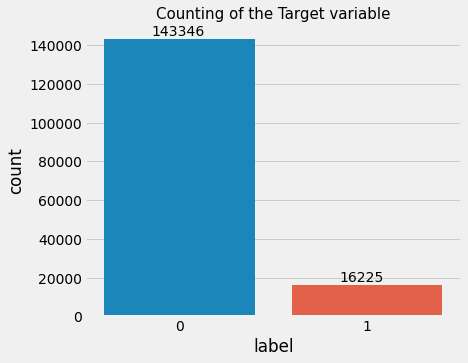

In [ ]:
#Univariate Analysis.
plt.figure(figsize=(6,5))
ax = sns.countplot(df['label'])
plt.title("Counting of the Target variable",fontsize=15)
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [ ]:
df['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [ ]:
# Creating the new column before cleaning the comment_text column
df['comment_length'] = df['comment_text'].str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


In [ ]:
#Data Cleaning steps.
#Remove HTML tags
#Remove special characters
#Convert everything to lowercase
#Remove stopwords
#Lemmatization

In [ ]:
# 1-Removing the HTML tags
# Regex rule : "<.*?>"
import re
def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)
df.comment_text = df.comment_text.apply(clean)
df.comment_text[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [ ]:
# 2- Removing special character like punctuation
# We can use string.punctuation or manually

def is_special(text):
    empty = ''
    for i in text:
        if i.isalpha():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty
df.comment_text = df.comment_text.apply(is_special)
df.comment_text[1]

'D aww  He matches this background colour I m seemingly stuck with  Thanks    talk         January           UTC '

In [ ]:
#3-Converting everything to lowercase
def lower(text):
    return text.lower()
df.comment_text = df.comment_text.apply(lower)
df.comment_text[1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk         january           utc '

In [ ]:
#Downloading NLTK Package.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# 4-Removing the stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','yo','Ja'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.comment_text = df.comment_text.apply(remove_stopwords)
df.comment_text[1]

['aww',
 'matches',
 'background',
 'colour',
 'seemingly',
 'stuck',
 'thanks',
 'talk',
 'january',
 'utc']

In [ ]:
# 5-Lemmatization
from nltk.stem import WordNetLemmatizer
def lema_text(text):
    lema = WordNetLemmatizer()
    return " ".join([lema.lemmatize(w) for w in text])

df.comment_text = df.comment_text.apply(lema_text)
df.comment_text[1]

'aww match background colour seemingly stuck thanks talk january utc'

In [ ]:
# Creating new column (cleaned_text) after removing puncuations,stopwords from news column to check how much data is cleaned
df['cleaned_text'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,cleaned_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [ ]:
# Total length removal
print("Origional Length:",df.comment_length.sum())
print("Cleaned Length:",df.cleaned_text.sum())
print("Total Words Removed:",(df.comment_length.sum()) - (df.cleaned_text.sum()))

Origional Length: 62893130
Cleaned Length: 38788758
Total Words Removed: 24104372


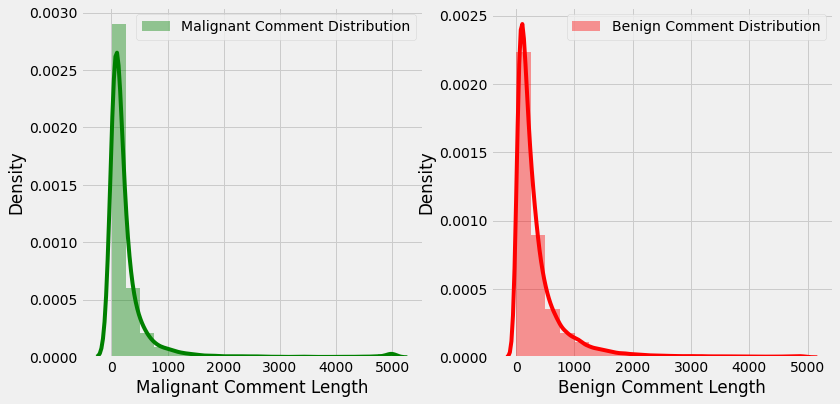

In [ ]:
#Plotting the distribution of comment beore cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(df[df['label']==1]['comment_length'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(df[df['label']==0]['comment_length'],bins=20, ax=ax[1],label='Benign Comment Distribution',color='r')
ax[1].set_xlabel('Benign Comment Length')
ax[1].legend()

plt.show()

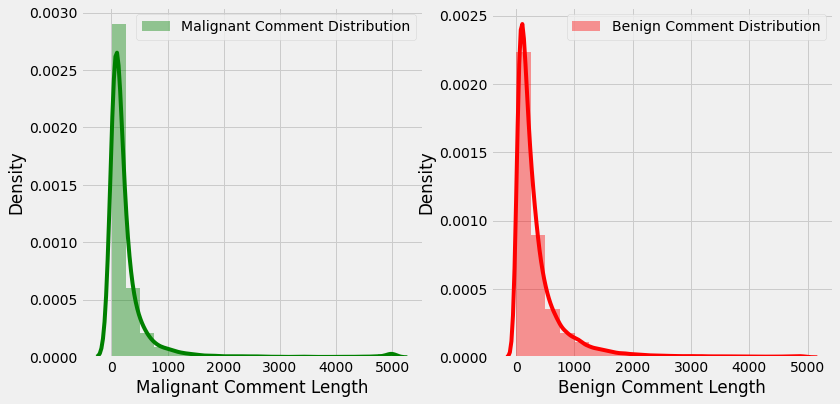

In [ ]:

#Plotting the distribution of comment beore cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(df[df['label']==1]['comment_length'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(df[df['label']==0]['comment_length'],bins=20, ax=ax[1],label='Benign Comment Distribution',color='r')
ax[1].set_xlabel('Benign Comment Length')
ax[1].legend()

plt.show()

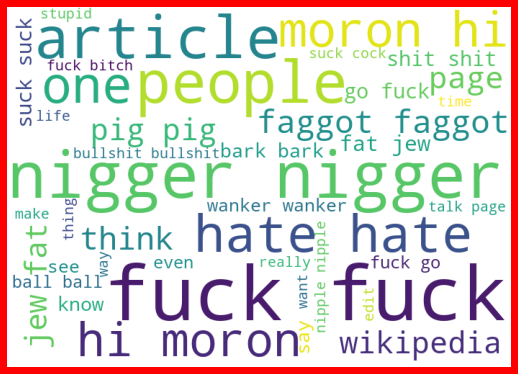

In [ ]:
#Getting sense of loud words for Malignant Comments in label column
from wordcloud import WordCloud
spams = df['comment_text'][df['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,5),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

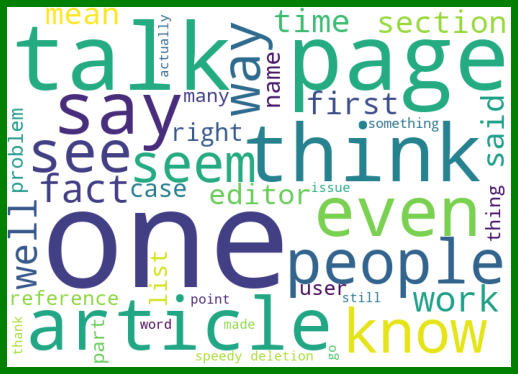

In [ ]:
#Getting sense of loud words for Benign Comments in label column
from wordcloud import WordCloud
spams = df['comment_text'][df['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,5),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

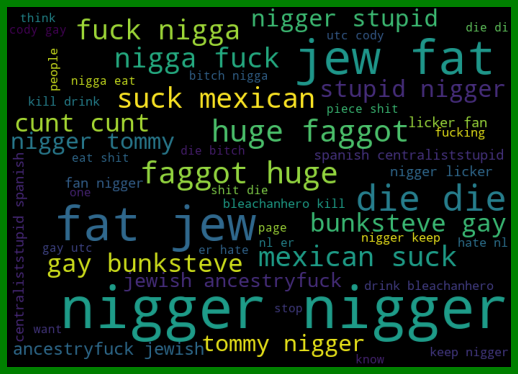

In [ ]:
#Getting sense of loud words which are offensive for loathe label
offensive = df['comment_text'][df['loathe']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,5),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

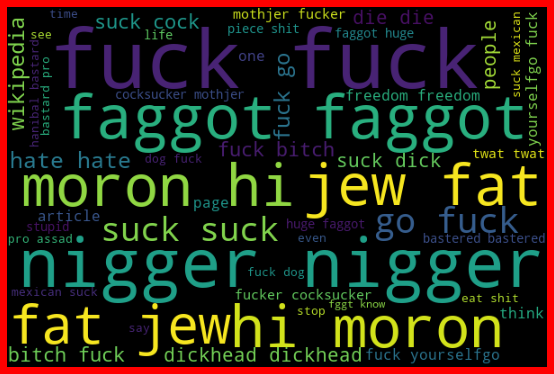

In [ ]:
#Getting sense of loud words which are offensive for abuse label
offensive = df['comment_text'][df['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,5),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Converting the text into vectors using TF-IDF Vectorizer:
#Importing the library and converting it into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [ ]:
#Independent Features
X = tf_vec.fit_transform(df['comment_text'])

In [ ]:
#Dependent Feature
y = df['label']

In [ ]:
#Checking the distribution of the labels
print("Count of Benign and Malignant Comments:\n",df.label.value_counts())

Count of Benign and Malignant Comments:
 0    143346
1     16225
Name: label, dtype: int64


In [ ]:
#Checking the distribution of the labels  percentage wise.
df['label'].value_counts(normalize=True) *100

0    89.832112
1    10.167888
Name: label, dtype: float64

In [ ]:
#Training the Model:
print(X.shape,'\t\t',y.shape)

(159571, 15000) 		 (159571,)


In [ ]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42,stratify=y)

In [ ]:
#Checking the shape of dependant variable.
print(x_train.shape,'\t\t',x_test.shape)

(119678, 15000) 		 (39893, 15000)


In [ ]:
#Checking the shape of dependant variable
print(y_train.shape,'\t',y_test.shape)

(119678,) 	 (39893,)


In [ ]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Importing the error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#Applying Logistic Regression:
lr = LogisticRegression()
grid = {'C':10*np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=15,random_state=None,shuffle=False)

In [ ]:
#Applying Cross Validation:
clf = GridSearchCV(lr,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([-20, -10,   0,  10,  20]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
#Importing Matrix:
y_pred_train = clf.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=clf.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9733785658182791

Test accuracy is 0.9585641591256612

[[35372   465]
 [ 1188  2868]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35837
           1       0.86      0.71      0.78      4056

    accuracy                           0.96     39893
   macro avg       0.91      0.85      0.88     39893
weighted avg       0.96      0.96      0.96     39893



In [ ]:
#Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Importing Matrix:
y_pred_train = classifier.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=classifier.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990140209562326

Test accuracy is 0.9558067831449126

[[35390   447]
 [ 1316  2740]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35837
           1       0.86      0.68      0.76      4056

    accuracy                           0.96     39893
   macro avg       0.91      0.83      0.87     39893
weighted avg       0.95      0.96      0.95     39893



In [ ]:
#XG Boost Classifier:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Importing Matrix:
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgb.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9396296729557646

Test accuracy is 0.9383851803574562

[[35746    91]
 [ 2367  1689]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35837
           1       0.95      0.42      0.58      4056

    accuracy                           0.94     39893
   macro avg       0.94      0.71      0.77     39893
weighted avg       0.94      0.94      0.93     39893



In [ ]:
#Lets Use Undersampling Technique:
from collections import Counter
Counter(y_train)

Counter({0: 107509, 1: 12169})

In [ ]:
# Importing the Undersampling library
from imblearn.under_sampling import NearMiss
ns = NearMiss(.8)
x_train_ns,y_train_ns = ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 107509, 1: 12169})
The number of classes after fit Counter({0: 15211, 1: 12169})


In [ ]:
#Using XG Boost with undersampling Technique:
from xgboost import XGBClassifier
xgb_us = XGBClassifier()
xgb_us.fit(x_train_ns,y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Importing Matrix:
y_pred_train = xgb_us.predict(x_train_ns)
print('Training accuracy is {}\n'.format(accuracy_score(y_train_ns, y_pred_train)))
y_pred_test=xgb_us.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.8210372534696859

Test accuracy is 0.939061990825458

[[35025   812]
 [ 1619  2437]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     35837
           1       0.75      0.60      0.67      4056

    accuracy                           0.94     39893
   macro avg       0.85      0.79      0.82     39893
weighted avg       0.93      0.94      0.94     39893



In [ ]:
#Lets Use Oversampling Technique:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Applying Oversampling Technique:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 107509, 1: 12169})
The number of classes after fit Counter({0: 107509, 1: 80631})


In [ ]:
#Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Importing Matrix:
y_pred_train = RFclassifier.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=RFclassifier.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9986797907719046

Test accuracy is 0.9536760835234251

[[35308   529]
 [ 1319  2737]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35837
           1       0.84      0.67      0.75      4056

    accuracy                           0.95     39893
   macro avg       0.90      0.83      0.86     39893
weighted avg       0.95      0.95      0.95     39893



In [ ]:
#Importing Matrix:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8300207405500657


In [ ]:
#ExtraTrees Classifier:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_os,y_train_os)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
#Importing Matrix:
y_pred_train = etc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=etc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9986797907719046

Test accuracy is 0.9540771563933522

[[35481   356]
 [ 1476  2580]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35837
           1       0.88      0.64      0.74      4056

    accuracy                           0.95     39893
   macro avg       0.92      0.81      0.86     39893
weighted avg       0.95      0.95      0.95     39893



In [ ]:
#Auc and ROC Score:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8130804036620115


In [ ]:
#Bagging Classifier:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train_os,y_train_os)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
#Importing Matrix:
y_pred_train = bc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=bc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9967161884389779

Test accuracy is 0.9351013962349284

[[34233  1604]
 [  985  3071]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     35837
           1       0.66      0.76      0.70      4056

    accuracy                           0.94     39893
   macro avg       0.81      0.86      0.83     39893
weighted avg       0.94      0.94      0.94     39893



In [ ]:
#AUC and ROC Score:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8561958452964686


In [ ]:
#XGBoost Classifier:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Importing XG-Boost Alogorithim:
xgb = XGBClassifier(max_depth=15,subsample= 0.8, n_estimators=400,learning_rate=0.01,min_child_weight=10, reg_alpha=0,reg_lambda=5)
xgb.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
#Importing Matrix:
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgb.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9522050836411037

Test accuracy is 0.9462061013210338

[[35102   735]
 [ 1411  2645]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     35837
           1       0.78      0.65      0.71      4056

    accuracy                           0.95     39893
   macro avg       0.87      0.82      0.84     39893
weighted avg       0.94      0.95      0.94     39893



In [ ]:
#AUC and ROC Score:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8158053931621915


In [ ]:
#SMOTETomek It is a method of imblearn. SMOTETomek is a hybrid method which uses on under sampling method (Tomek) in with over sampling method (SMOTE).

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
st = SMOTETomek(0.75)
x_train_st,y_train_st = st.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 107509, 1: 12169})
The number of classes after fit Counter({0: 107491, 1: 80613})


In [ ]:
#we will be using XG Boost classifier because it gave us good score:
xgbs = XGBClassifier(max_depth=15,subsample= 0.8, n_estimators=400,learning_rate=0.01,min_child_weight=10, reg_alpha=0,reg_lambda=5)
xgbs.fit(x_train_st,y_train_st)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
#Importing Matrix:
y_pred_train = xgbs.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgbs.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9482528117114256

Test accuracy is 0.9429724513072469

[[35095   742]
 [ 1533  2523]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     35837
           1       0.77      0.62      0.69      4056

    accuracy                           0.94     39893
   macro avg       0.87      0.80      0.83     39893
weighted avg       0.94      0.94      0.94     39893



In [ ]:
#AUC and ROC Score:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8006682810054003


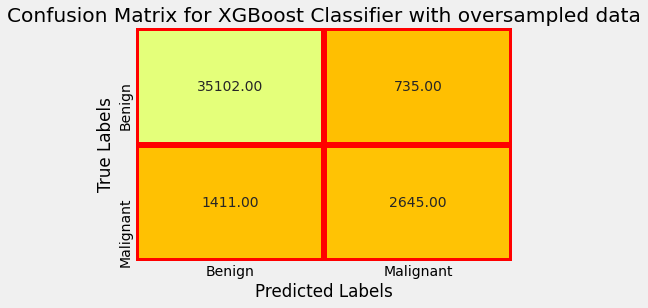

In [ ]:
#The AUC Score,f1-score and recall value is high when we use XGBoost with over sampling data. So we choose XGBoost model with over sampled data as our final model.
#Plotting Confusion Matrix for XGBoost Classifier with oversampled data.
cm=confusion_matrix(y_test,xgb.predict(x_test))
ax=plt.subplot()
sns.heatmap(cm,annot=True,cbar=False,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cmap='Wistia_r')
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

plt.title("Confusion Matrix for XGBoost Classifier with oversampled data")
ax.xaxis.set_ticklabels(['Benign','Malignant'])
ax.yaxis.set_ticklabels(['Benign','Malignant'])
plt.show()
plt.show()

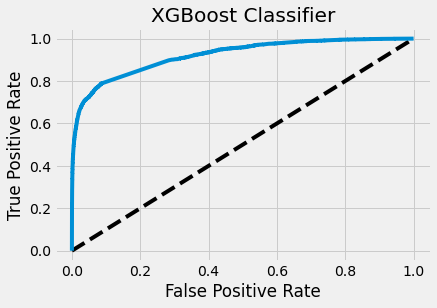

0.8158053931621915


In [ ]:
#AUC_ROC Curve of XGBoost Classifier with oversampled data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.show()

auc_score=roc_auc_score(y_test,xgb.predict(x_test))
print(auc_score)

In [ ]:
#Model Validation:
#Cleaning steps via calling our function for test data

# 1.Removing HTML tags
df1.comment_text = df1.comment_text.apply(clean)

#2.Removing Special Characters
df1.comment_text = df1.comment_text.apply(is_special)

#3.Convert into lower case
df1.comment_text = df1.comment_text.apply(lower)

#4.Stopwords Removal
df1.comment_text = df1.comment_text.apply(remove_stopwords)

#5.Lemmatization
df1.comment_text = df1.comment_text.apply(lema_text)

In [ ]:
df1_data =tf_vec.fit_transform(df1['comment_text'])
df1_data

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2889641 stored elements in Compressed Sparse Row format>

In [ ]:
prediction = xgb.predict(df1_data)
prediction

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#Saving the model
import joblib

#Save the model as a pickle in a file
model = joblib.dump(xgb,'Malignant Comment.pkl')
model

['Malignant Comment.pkl']